In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plot_utils import set_size
from matplotlib import rc
%load_ext autoreload
%autoreload 2

f = 16.17*0.75
tex_fonts = {
    # Use LaTeX to write all text
    "font.family": "sans-serif",
    "axes.labelsize": f,
    "font.size": f,
    
    # Make the legend/label fonts a little smaller
    "legend.fontsize": f-2,
    "xtick.labelsize": f-2,
    "ytick.labelsize": f-2,
    "axes.titlesize": f,
}

plt.rcParams.update(tex_fonts)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
data = pd.read_csv('latest.csv', index_col=0)

In [44]:
def plot_operation(operation):
    _data = data.query(f'params_get_operation == "{operation}"')

    grouped = _data.groupby(['params_get_operation', 'params_density'])

    fig, axes = plt.subplots(1,2, figsize=set_size('blog', subplots=(1,2)), sharey=True)


    for ((operation, density), group), ax in zip(grouped, axes):
        for dtype, g in group.groupby('extra_info_dtype'):
            ax.errorbar(g.params_size, g.stats_mean, g.stats_stddev,
                         fmt='.-', label=dtype)

        ax.set_title(f"{operation} {density}".capitalize())
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlabel("N")
    axes[0].set_ylabel("Time (s)")

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, ncol=3, loc='center', bbox_to_anchor=(0.5, -0.4))
    fig.patch.set_facecolor('xkcd:white')
    plt.savefig(f'{operation}.svg', bbox_inches='tight')

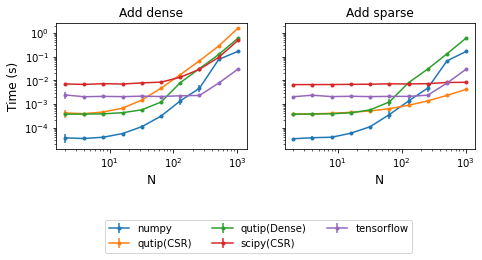

In [45]:
plot_operation('add')

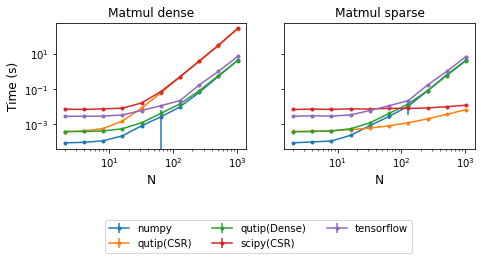

In [46]:
plot_operation('matmul')

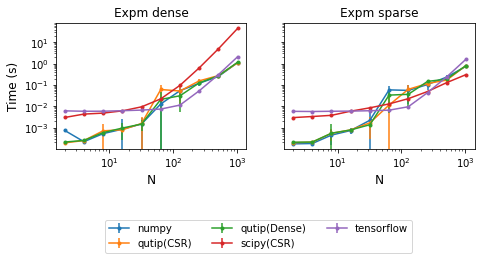

In [47]:
plot_operation('expm')

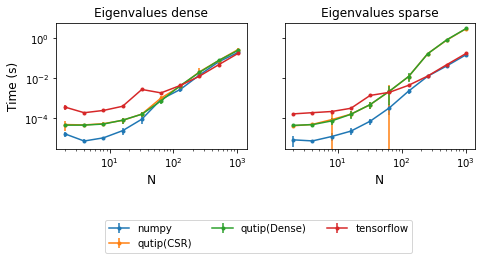

In [48]:
plot_operation('eigenvalues')